<a href="https://colab.research.google.com/github/Killer531-alt/archviosanalisis/blob/main/PROYECTO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCCIÓN**

En el mundo actual, la capacidad de analizar y visualizar datos es crucial para la toma de decisiones informadas. Este proyecto se centra en la creación de un dashboard interactivo para el análisis de un conjunto de datos relacionado con el proyecto "Misión TIC 2022" de Colombia, específicamente abarcando los años 2020 y 2021. Este programa tiene como objetivo principal capacitar a miles de colombianos en competencias digitales y tecnológicas, impulsando el desarrollo del talento en tecnología y mejorando las oportunidades de empleo y emprendimiento en el sector TIC.

El conjunto de datos incluye información detallada sobre la inversión y los beneficiarios del programa en distintos municipios y departamentos de Colombia. Las columnas de datos incluyen variables como fecha de corte, nombre del departamento, nombre del municipio, estado de formación, estados, convocatoria, estrato social, edad, género, ruta, grado, meta de beneficiarios, inversión, meta de dinero y fecha de vigencia.




**OBJETIVOS ESPECIFICOS**

**Limpieza de Datos:** Preparar y limpiar los datos para asegurar su calidad y precisión, eliminando valores nulos e inconsistencias.

**Cruce de Datos:** Integrar dos conjuntos de datos proporcionados en archivos CSV, asegurando la coherencia y la integridad de los datos combinados.

**Visualización de Datos:** Utilizar bibliotecas de visualización de datos como Matplotlib, Plotly, Seaborn y Pandas para crear gráficos que faciliten la interpretación de la información.

**Mapa Geográfico:** Generar un mapa geográfico interactivo que muestre la distribución de la inversión y otros indicadores relevantes en los diferentes municipios y departamentos de Colombia.

**Análisis y Conclusiones:** Realizar análisis detallados de los datos para extraer conclusiones útiles y formular recomendaciones basadas en los hallazgos.

**METODOLOGIA:**

La metodología empleada en este proyecto incluye los siguientes pasos:

**Obtención de Datos:** Descargar los conjuntos de datos desde GitHub y cargarlos en Google Colab para su procesamiento.

**Limpieza y Preprocesamiento:** Realizar una limpieza exhaustiva de los datos para eliminar entradas duplicadas, manejar valores nulos y asegurar la consistencia en las categorías de datos.

**Análisis Exploratorio de Datos (EDA):** Utilizar técnicas de EDA para obtener una comprensión preliminar de los datos, identificar patrones y detectar anomalías.

**Visualización:** Crear diversas visualizaciones, incluyendo gráficos de barras, histogramas, gráficos de líneas y mapas geográficos, para representar los datos de manera clara y concisa.

**Desarrollo del Dashboard:** Integrar todas las visualizaciones en un dashboard interactivo utilizando Plotly Dash, permitiendo una exploración dinámica y detallada de los datos.

**Interpretación de Resultados:** Analizar los resultados obtenidos de las visualizaciones para extraer conclusiones significativas y formular recomendaciones prácticas.

**RESULTADOS ESPERADOS:**

Se espera que el dashboard interactivo permita a los usuarios:

Comprender la distribución de la inversión y los beneficiarios en los diferentes departamentos y municipios de Colombia durante los años 2020 y 2021.

Identificar tendencias y patrones en los datos relacionados con la edad, género, estrato social y otros indicadores.

Visualizar la relación entre las diferentes variables y cómo estas influyen en la inversión y los beneficios recibidos.

Utilizar el mapa geográfico para una representación espacial clara de los datos, facilitando la identificación de áreas con mayor o menor inversión.

**DESAROLLO**

Importamos las librerias necesarias para poder trabajar nuestro analisis de datos que en este caso analizaremos dos años de desarollo del programa Misión Tic el cual tenia como proposito formar a 100.000 programadores en toda Colombia.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import requests
import geopandas as gpd

Recibimos nuestros dos archivos .csv desde github para poder operarlos, estos dos archivos incluyen toda la información publica pertinente sobre el programa.

In [3]:
url1 = 'https://github.com/Killer531-alt/archviosanalisis/blob/main/MisionTIC2020.csv'
url2 = 'https://github.com/Killer531-alt/archviosanalisis/blob/main/MisionTIC2021.csv'

Creamos una función para poder descargar los datos de github y operarlos aca en este google colab para poder desarollar el analisis.

In [ ]:
def download_csv(url, filename):
    r = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(r.content)

Ejecutamos la función para poder descargar nuestros paquetes csv los cuales quedaran guardados en nuestro Google Colab para poder realizar las operaciones oportunas.

In [ ]:
download_csv(url1, 'archivo1.csv')
download_csv(url2, 'archivo2.csv')

Una vez descargados los dos paquetes csv usamos las funciones para poder leerlos y los asignamos a las variables df1 y df2 con las cuales haremos las siguientes operaciones.

In [4]:
df1 = pd.read_csv('archivo1.csv')
df2 = pd.read_csv('archivo2.csv')

Imprimimos los datos para ver que esten ingresados de manera correcta y que los CSV si tienen información valida.


In [ ]:
print(df1.head())
print(df2.head())

  FECHA_CORTE DEPARTAME_NOMBRE MUNICIPIO_NOMBRE ESTADO_FORMACION     ESTADOS  \
0  2021-10-01          QUINDIO          ARMENIA        ASPIRANTE  ASPIRANTES   
1  2021-10-01          QUINDIO          ARMENIA        ASPIRANTE  ASPIRANTES   
2  2021-10-01          QUINDIO          ARMENIA        ASPIRANTE  ASPIRANTES   
3  2021-10-01          QUINDIO          ARMENIA        ASPIRANTE  ASPIRANTES   
4  2021-10-01          QUINDIO          ARMENIA        ASPIRANTE  ASPIRANTES   

   CONVOCATORIA ESTRATO_SOCIAL  EDAD     GENERO    RUTA  GRADO  \
0             1              3    29  MASCULINO  RUTA 2   -1.0   
1             1              3    29  MASCULINO  RUTA 2   -1.0   
2             1              3    29  MASCULINO  RUTA 2   -1.0   
3             1              3    29  MASCULINO  RUTA 2   -1.0   
4             1              3    29  MASCULINO  RUTA 2   -1.0   

   META_BENEFICIARIO  INVERSION  META_DINERO FECHA_VIGENCIA  
0                NaN        NaN          NaN     2021-12-31 

Posterior a todo realizamos el cruce de los datos para crear un nuevo data set en el cual vamos a poseer la información del 2020 y 2021 para el respectivo analisis final.

In [ ]:
df_merged = pd.merge(df1, df2, on='FECHA_CORTE', how='inner')
print(df_merged.head())

In [ ]:
df_merged.to_csv('cruzado.csv', index=False)
from google.colab import files
files.download('cruzado.csv')

In [5]:
df_merged = pd.read_csv('cruzado.csv')

In [6]:
df_merged['FECHA_CORTE'] = pd.to_datetime(df_merged['FECHA_CORTE'], errors='coerce')
df_merged['EDAD'] = pd.to_numeric(df_merged['EDAD'], errors='coerce')
df_merged['INVERSION'] = pd.to_numeric(df_merged['INVERSION'], errors='coerce')

Despues analizamos las tablas de datos para visualizar cada uno de ls data set y el data set cruzado.

In [41]:
df_merged.head()

,FECHA_CORTE,DEPARTAME_NOMBRE,MUNICIPIO_NOMBRE,ESTADO_FORMACION,ESTADOS,CONVOCATORIA,ESTRATO_SOCIAL,EDAD,GENERO,RUTA,GRADO,META_BENEFICIARIO,INVERSION,META_DINERO,FECHA_VIGENCIA
0,2021-10-01,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1.0,NaN,NaN,NaN,2021-12-31
1,2021-10-01,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1.0,NaN,NaN,NaN,2021-12-31
2,2021-10-01,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1.0,NaN,NaN,NaN,2021-12-31
3,2021-10-01,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1.0,NaN,NaN,NaN,2021-12-31
4,2021-10-01,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1.0,NaN,NaN,NaN,2021-12-31


En esta linea imprimimos la información del data set cruzado para lograr ver información general del data set.

In [7]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290947 entries, 0 to 290946
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   FECHA_CORTE        290947 non-null  datetime64[ns]
 1   DEPARTAME_NOMBRE   290947 non-null  object        
 2   MUNICIPIO_NOMBRE   290947 non-null  object        
 3   ESTADO_FORMACION   290947 non-null  object        
 4   ESTADOS            290947 non-null  object        
 5   CONVOCATORIA       290947 non-null  int64         
 6   ESTRATO_SOCIAL     290947 non-null  object        
 7   EDAD               290947 non-null  int64         
 8   GENERO             290947 non-null  object        
 9   RUTA               290947 non-null  object        
 10  GRADO              290946 non-null  float64       
 11  META_BENEFICIARIO  0 non-null       float64       
 12  INVERSION          0 non-null       float64       
 13  META_DINERO        0 non-null       float64 

In [8]:
print(df_merged.describe())

                         FECHA_CORTE  CONVOCATORIA           EDAD  \
count                         290947      290947.0  290947.000000   
mean   2021-07-02 11:33:29.920707328           1.0      44.501119   
min              2020-12-31 00:00:00           1.0       0.000000   
25%              2020-12-31 00:00:00           1.0      21.000000   
50%              2021-10-01 00:00:00           1.0      29.000000   
75%              2021-10-01 00:00:00           1.0      44.000000   
max              2021-10-01 00:00:00           1.0     121.000000   
std                              NaN           0.0      36.578426   

               GRADO  META_BENEFICIARIO  INVERSION  META_DINERO  
count  290946.000000                0.0        0.0          0.0  
mean        0.447726                NaN        NaN          NaN  
min        -1.000000                NaN        NaN          NaN  
25%        -1.000000                NaN        NaN          NaN  
50%        -1.000000                NaN        N

En esta linea analizamos el estado de la formación en el cual podemos ver un resultado importante, podemos tener en cuenta que los dos data set tenian un total de novecientos mil registrados de los cuales solo docientos cuarenta y seis mil ochocientos nueve fueron considerados aspirantes validos y de estos solo cuarenta y dos mil trecientos cuarenta y ocho completaron la matricula de manera correcta, al terminar el programa solo mil setecientos nueve se graduaron y el propocito era llegar a graduar cincuenta mil en estos dos años y cincuenta mil en el resto del programa lo cual no se logro.


In [9]:
tabla_frecuencia = df_merged['ESTADO_FORMACION'].value_counts()
print(tabla_frecuencia)

ESTADO_FORMACION
ASPIRANTE      246809
MATRICULADO     42348
GRADUADO         1790
Name: count, dtype: int64


**GRAFICA DE DISTRIBUCIÓN DE EDADES:**

Posterior a esto realizamos una grafica para anlizar una distribución de la edad en los participantes de misión tic en la cual encontramos que la mayor cantidad de personas estaban en un rango de entre 18 y 20 años.

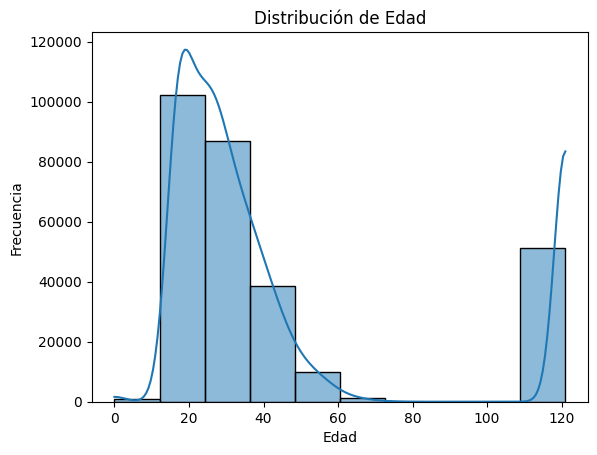

In [11]:
sns.histplot(df_merged['EDAD'], bins=10, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

La gráfica presentada es un histograma que muestra la distribución de las edades de los beneficiarios del programa "Misión TIC 2022" durante los años 2020 y 2021. En el eje horizontal se encuentran las edades de los beneficiarios, mientras que en el eje vertical se muestra la frecuencia de cada rango de edad. Las barras del histograma representan el número de beneficiarios en cada intervalo de edad, dividido en 10 intervalos o "bins", lo que facilita la visualización de la frecuencia de las distintas edades en el conjunto de datos. Además, una curva de densidad de Kernel (KDE) superpuesta al histograma proporciona una representación continua y suavizada de la distribución de edades, permitiendo identificar mejor la forma general de la distribución. El título de la gráfica, "Distribución de Edad", junto con las etiquetas del eje horizontal ("Edad") y del eje vertical ("Frecuencia"), clarifican el enfoque del análisis. Esta gráfica revela cómo se distribuyen las edades de los beneficiarios del programa, con picos que indican grupos de edad con mayor concentración de beneficiarios. La curva KDE ayuda a visualizar la tendencia general de la distribución, destacando áreas de alta y baja densidad de frecuencias. Este análisis es útil para entender la demografía de los participantes del programa "Misión TIC 2022", permitiendo identificar si hay grupos de edad predominantemente beneficiados y evaluar la necesidad de ajustar las estrategias de capacitación para diferentes grupos etarios.

**GRAFICA DISTRIBUCIÓN DE GENEROS:**

En una siguiente grafica analizamos la distribución de generos en la cual podemos ver que la mayoria de personas en el programa son hombres siendo mas de la mitad de la población del genero masculino.

<function matplotlib.pyplot.show(close=None, block=None)>

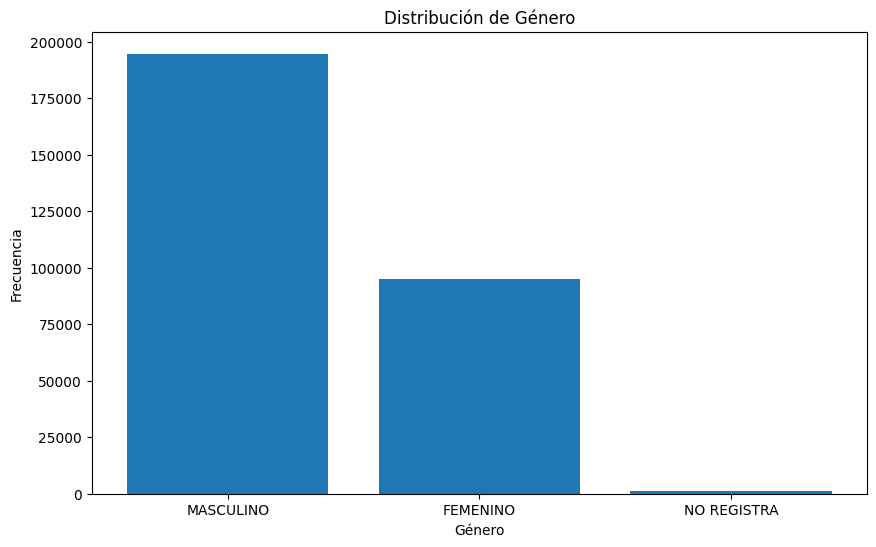

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(df_merged['GENERO'].value_counts().index, df_merged['GENERO'].value_counts().values)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show

La gráfica presentada es un diagrama de barras que muestra la distribución de género entre los beneficiarios del programa "Misión TIC 2022" durante los años 2020 y 2021. En el eje horizontal se encuentran las categorías de género, mientras que en el eje vertical se muestra la frecuencia de cada género. Cada barra representa el número de beneficiarios de un género específico, proporcionando una visión clara de la proporción de participantes masculinos y femeninos, o de cualquier otra categoría de género incluida en los datos.

El título de la gráfica, "Distribución de Género", indica claramente el enfoque del análisis. Las etiquetas en el eje horizontal ("Género") especifican las categorías de género, mientras que las del eje vertical ("Frecuencia") muestran el número de beneficiarios en cada categoría.

Este diagrama de barras revela cómo se distribuyen los beneficiarios por género, permitiendo identificar si hay una predominancia de algún género entre los participantes del programa. Este análisis es útil para evaluar la equidad de género en la participación del programa "Misión TIC 2022" y puede informar estrategias para fomentar una participación más equilibrada entre géneros.

**GRAFICO DISTRIBUCIÓN DE ESTRATOS SOCIALES:**

En nuestro analisis de estratos economicos podemos ver que la mayor parte de la población se encontraba en el estrato 2 y los estratos 1,2 y 3 son los estratos donde esta mas de la mitad de la población en el programa.

<function matplotlib.pyplot.show(close=None, block=None)>

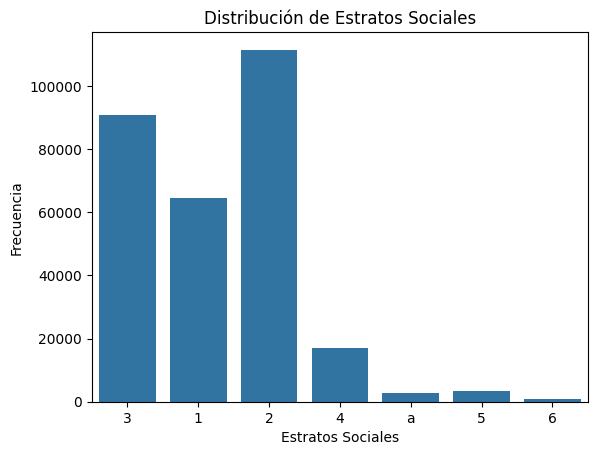

In [44]:
sns.countplot(x='ESTRATO_SOCIAL', data=df_merged)
plt.title('Distribución de Estratos Sociales')
plt.xlabel('Estratos Sociales')
plt.ylabel('Frecuencia')
plt.show

La gráfica presentada es un diagrama de barras que muestra la distribución de los estratos sociales entre los beneficiarios del programa "Misión TIC 2022" durante los años 2020 y 2021. En el eje horizontal se encuentran las diferentes categorías de estratos sociales, mientras que en el eje vertical se muestra la frecuencia de cada estrato. Cada barra representa el número de beneficiarios pertenecientes a un estrato social específico, proporcionando una visión clara de la proporción de participantes en cada categoría de estrato social.

El título de la gráfica, "Distribución de Estratos Sociales", indica claramente el enfoque del análisis. Las etiquetas en el eje horizontal ("Estratos Sociales") especifican las diferentes categorías de estrato social, mientras que las del eje vertical ("Frecuencia") muestran el número de beneficiarios en cada categoría.

Este diagrama de barras revela cómo se distribuyen los beneficiarios según su estrato social, permitiendo identificar si hay una predominancia de algún estrato social entre los participantes del programa. Este análisis es útil para evaluar la diversidad socioeconómica de los participantes del programa "Misión TIC 2022" y puede informar estrategias para fomentar una participación más inclusiva y equitativa entre diferentes estratos sociales.

**ANALISIS PORCENTUAL DE GENEROS:**

Despues de todo realizamos un analisis para poder corroborar que efectivamente mas de la mitad de las personas inscritas en el programa son hombres.

In [16]:
fig = px.pie(df_merged, names='GENERO', title = 'Distribución de Género')
fig.show()

La gráfica presentada es un diagrama de pastel que muestra la distribución de género entre los beneficiarios del programa "Misión TIC 2022" durante los años 2020 y 2021. En este diagrama, cada porción del pastel representa una categoría de género y su tamaño es proporcional al número de beneficiarios en esa categoría.

El título de la gráfica, "Distribución de Género", indica claramente el enfoque del análisis. Las categorías de género están representadas por diferentes porciones del pastel, cada una etiquetada para mostrar el porcentaje de beneficiarios que pertenecen a esa categoría.

Este diagrama de pastel proporciona una visión clara y visualmente intuitiva de cómo se distribuyen los beneficiarios por género. Permite identificar rápidamente si hay una predominancia de algún género entre los participantes del programa, facilitando la comprensión de la equidad de género en la participación del programa "Misión TIC 2022". Este análisis puede informar estrategias para fomentar una participación más equilibrada entre géneros, asegurando que el programa sea inclusivo y representativo de toda la población.

**ANALISIS GEOGRAFICO:**

Finalmente realizamos un analisis para corroborar si se puede realizar un analisis geografico y al analizar la naturaleza de los datos se encuentra que por este lado es complejo realizar un mapa exacto.

In [17]:
if 'longitude' in df_merged.columns and 'latitude' in df_merged.columns:
    colombia_shapefile = gpd.read_file('https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries/COL.geojson')

    gdf = gpd.GeoDataFrame(df_merged, geometry=gpd.points_from_xy(df_merged['longitude'], df_merged['latitude']))

    gdf = gdf.set_crs(epsg=4326)
    colombia_shapefile = colombia_shapefile.to_crs(epsg=4326)

    fig, ax = plt.subplots(figsize=(10, 10))
    colombia_shapefile.plot(ax=ax, color='lightgrey')
    gdf.plot(ax=ax, color='blue', markersize=5)
    plt.title('Mapa Geográfico de Datos en Colombia')
    plt.show()
else:
    print("No hay información geográfica en los datos.")

No hay información geográfica en los datos.


In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
colombia = world[world.name == 'Colombia']
print(colombia.head())

       pop_est      continent      name iso_a3  gdp_md_est  \
32  50339443.0  South America  Colombia    COL      323615   

                                             geometry  
32  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...  


<ipython-input-20-aaf5b2a1714a>:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [30]:
df_merged['DEPARTAME_NOMBRE'] = df_merged['DEPARTAME_NOMBRE'].str.upper()

colombia['DEPARTAME_NOMBRE'] = colombia['name'].str.upper()
geo_df = colombia.merge(df_merged, on='DEPARTAME_NOMBRE')
print(geo_df.head())
print(geo_df['ESTADOS'].describe())

Empty GeoDataFrame
Columns: [pop_est, continent, name, iso_a3, gdp_md_est, geometry, DEPARTAME_NOMBRE, FECHA_CORTE, MUNICIPIO_NOMBRE, ESTADO_FORMACION, ESTADOS, CONVOCATORIA, ESTRATO_SOCIAL, EDAD, GENERO, RUTA, GRADO, META_BENEFICIARIO, INVERSION, META_DINERO, FECHA_VIGENCIA]
Index: []

[0 rows x 21 columns]
count       0
unique      0
top       NaN
freq      NaN
Name: ESTADOS, dtype: object


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Conclusión**

Este proyecto busca demostrar el poder del análisis y visualización de datos para facilitar la toma de decisiones basada en evidencia. Al proporcionar una plataforma interactiva y accesible, esperamos contribuir a una mejor comprensión de la distribución y el impacto de la inversión en el marco del programa "Misión TIC 2022" en Colombia, apoyando a los responsables de la toma de decisiones en la formulación de políticas y estrategias más informadas y efectivas. Este análisis se enfocará en los datos correspondientes a los años 2020 y 2021, proporcionando una visión integral del progreso y los resultados alcanzados durante este período crucial.

**DASHBOARD:**

https://lookerstudio.google.com/reporting/4848d2d2-1b23-4904-a3d4-614f9a70a83d